## Predict Credit Card Defaulting

This dataset has the cases of customer default payments in Taiwan.
Dataset - (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 


In [1]:
#required imports
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
pip install xlrd

     ---------------------------------------- 96.5/96.5 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", header=1)
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In the following, you can take a look into the dataset.

In [6]:
dataset.columns.to_list()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
dataset.drop(['ID'], axis=1, inplace=True)
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
#Selecting X and y

y = dataset['default payment next month']

In [9]:
X = dataset.drop(['default payment next month'], axis = 1)

In [10]:
print(y.shape)
print(X.shape)

(30000,)
(30000, 23)


In [11]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 23) (6000, 23) (24000,) (6000,)


In [12]:
#scaling the dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Decision tree

In [13]:
decision_tree = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=123)
decision_tree.fit(X_train, y_train.values)
decision_tree.score(X_test, y_test)

y_pred =decision_tree.predict(X_test)
y_pred_proba = decision_tree.predict_proba(X_test)

In [14]:
#Accuracy, Precision, Recall, F1 score and ROC AUC scores

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_dtree=accuracy_score(y_test, y_pred)
precision_dtree=precision_score(y_test, y_pred)
recall_dtree=recall_score(y_test, y_pred)
f1_dtree=f1_score(y_test, y_pred)
d_tree_auc=roc_auc_score(y_test, y_pred_proba[:,1])

print(f"accuracy_score: {accuracy_dtree}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba[:,1])}")


accuracy_score: 0.8216666666666667
precision_score: 0.6812411847672779
recall_score: 0.36397889977392617
f1_score: 0.4744597249508841
roc_auc_score: 0.732430414036543


### Decision Tree with Hyperparameter tuning and Grid Search CV

In [17]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()

param = {'criterion':['gini', 'entropy'],
         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        }


grid_dtree =  GridSearchCV(decision_tree, param_grid=param, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_dtree.fit(X_train, y_train.values)

elapsed_time = time.time() - start_time

print('Time in seconds: ', elapsed_time)
print('Best param', grid_dtree.best_params_)
print('Score: {0:.4f}'.format(grid_dtree.best_score_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Time in seconds:  6.351664781570435
Best param {'criterion': 'entropy', 'max_depth': 5}
Score: 0.7557


In [18]:
#Testing the model on the test set with the best parameter = 50

decision_tree2 = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=123)
decision_tree2.fit(X_train, y_train.values)
decision_tree2.score(X_test, y_test)

y_pred_gs =decision_tree2.predict(X_test)
y_pred_proba_gs = decision_tree2.predict_proba(X_test)

In [19]:
accuracy_gs=accuracy_score(y_test, y_pred_gs)
precision_gs=precision_score(y_test, y_pred_gs)
recall_gs=recall_score(y_test, y_pred_gs)
f1_gs=f1_score(y_test,y_pred_gs)

print(f"accuracy_score: {accuracy_score(y_test, y_pred_gs)}")
print('Precision: %.4f' % precision_score(y_test, y_pred_gs))
print('Recall: %.3f' % recall_score(y_test, y_pred_gs))
print('F1 score: %.3f' % f1_score(y_test, y_pred_gs))
gs_auc= roc_auc_score(y_test, y_pred_proba_gs[:,1])
print('auc: %.3f' % gs_auc)

accuracy_score: 0.8211666666666667
Precision: 0.6841
Recall: 0.356
F1 score: 0.468
auc: 0.752


In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_gs[:,1])
auc = roc_auc_score(y_test, y_pred_proba_gs[:,1])
auc


0.7518597997023417

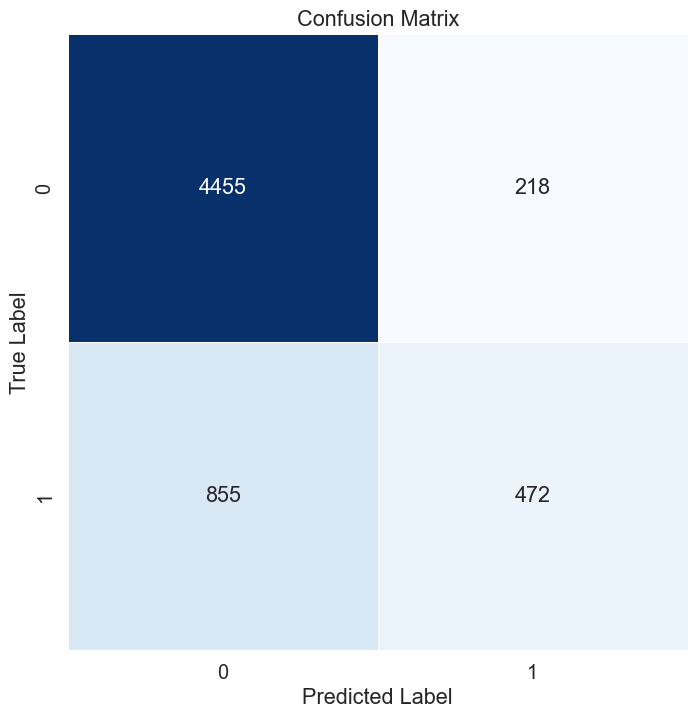

In [21]:
conf_matrix = confusion_matrix(y_test,y_pred_gs)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix,annot=True, cbar=False, cmap='Blues',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix');

### Decision Tree with Random Search CV

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
start_time=time.time()

params = {"max_depth": [1,2,3,4,5,6,7,8,9,10],
          "max_features": [1,2,3,4,5,6,7,8,9,10],
          "min_samples_leaf": [2,3,4,5,6,7,8,9,10],
          "criterion": ["gini", "entropy"]}

random_search_cv = RandomizedSearchCV(decision_tree, params, cv=5, scoring ='roc_auc', verbose=1, n_jobs=-1, random_state=123)

random_search_cv.fit(X_train, y_train.values)
elapsed_time = time.time() - start_time

print('Time in seconds: ', elapsed_time)
print('Best param', random_search_cv.best_params_)
print('Score: {0:.4f}'.format(random_search_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Time in seconds:  1.4093689918518066
Best param {'min_samples_leaf': 4, 'max_features': 7, 'max_depth': 6, 'criterion': 'entropy'}
Score: 0.7534


In [24]:
#Testing the model on the test set with the best parameter = 50

decision_tree3 = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=123, min_samples_leaf= 4, max_features= 7)
decision_tree3.fit(X_train, y_train.values)
decision_tree3.score(X_test, y_test)

y_pred_rcv =decision_tree3.predict(X_test)
y_pred_proba_rcv = decision_tree3.predict_proba(X_test)

In [25]:
accuracy_rcv=accuracy_score(y_test, y_pred_rcv)
precision_rcv=precision_score(y_test, y_pred_rcv)
recall_rcv=recall_score(y_test, y_pred_rcv)
f1_rcv=f1_score(y_test,y_pred_rcv)

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_rcv))
print('Precision: %.4f' % precision_score(y_test, y_pred_rcv))
print('Recall: %.3f' % recall_score(y_test, y_pred_rcv))
print('F1 score: %.3f' % f1_score(y_test, y_pred_rcv))

rcv_auc=roc_auc_score(y_test, y_pred_proba_rcv[:,1])
print('roc_auc:%.3f' % rcv_auc )

Accuracy: 0.8130
Precision: 0.6273
Recall: 0.381
F1 score: 0.474
roc_auc:0.756


Random search has a lower accuracy score than grid search cv. We will compare the results in detail towards the end of this notebook.

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

start_time=time.time()
param_rnd = {'n_estimators':[4, 5, 10, 20, 50]}

rnd_clf = RandomForestClassifier(random_state=123)
grid_cv_rnd = GridSearchCV(rnd_clf, param_grid=param_rnd, cv=5, scoring='roc_auc')
grid_cv_rnd.fit(X_train, y_train.values)

elapsed_time=time.time()-start_time

print('Time in seconds: ', elapsed_time)
print('Best param', grid_cv_rnd.best_params_)
print('Score: {0:.4f}'.format(grid_cv_rnd.best_score_))


Time in seconds:  42.25090837478638
Best param {'n_estimators': 50}
Score: 0.7571


In [27]:
#Testing the model on the test set with the best parameter = 50

rnd_clf = RandomForestClassifier(n_estimators=50, random_state=123)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
y_pred_rf_proba = rnd_clf.predict_proba(X_test)

In [28]:
#Accuracy, Precision, Recall, F1 score and ROC AUC scores

accuracy_rnd=accuracy_score(y_test, y_pred_rf)
precision_rnd=precision_score(y_test, y_pred_rf)
recall_rnd=recall_score(y_test, y_pred_rf)
f1_rnd=f1_score(y_test,y_pred_rf)

print(f"accuracy_score: {accuracy_score(y_test, y_pred_rf)}")
print(f"precision_score: {precision_score(y_test, y_pred_rf)}")
print(f"recall_score: {recall_score(y_test, y_pred_rf)}")
print(f"f1_score: {f1_score(y_test, y_pred_rf)}")
rnd_auc=roc_auc_score(y_test, y_pred_rf_proba[:,1])
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_rf_proba[:,1])}")

accuracy_score: 0.8133333333333334
precision_score: 0.6427586206896552
recall_score: 0.35116804822908815
f1_score: 0.45419103313840153
roc_auc_score: 0.7553254913546387


In [29]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=rnd_clf, X=X_train, y=y_train,
                                                        cv=5, train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


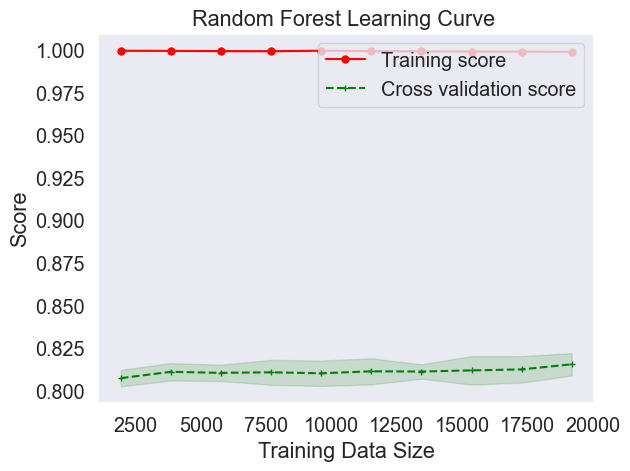

In [30]:
#Learning curve

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Random Forest Learning Curve ')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid()
plt.legend(loc='upper right')
plt.show()

There is a huge difference between training and validation accuracy. This model suffers from high variance (overfitting). However, the crossvalidation score seem to increase with increase in data size.

### Adaboost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=123,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
y_pred_ada_proba = ada_clf.predict_proba(X_test)


In [32]:
accuracy_ada=accuracy_score(y_test, y_pred_ada)
precision_ada=precision_score(y_test,y_pred_ada)
recall_ada=recall_score(y_test, y_pred_ada)
f1_ada=f1_score(y_test,y_pred_ada)


print(f"accuracy_score: {accuracy_score(y_test, y_pred_ada)}")
print(f"precision_score: {precision_score(y_test, y_pred_ada)}")
print(f"recall_score: {recall_score(y_test, y_pred_ada)}")
print(f"f1_score: {f1_score(y_test, y_pred_ada)}")
ada_auc=roc_auc_score(y_test, y_pred_ada_proba[:,1])
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_ada_proba[:,1])}")

accuracy_score: 0.8166666666666667
precision_score: 0.6810207336523126
recall_score: 0.32177844762622454
f1_score: 0.4370522006141249
roc_auc_score: 0.7776743727011027


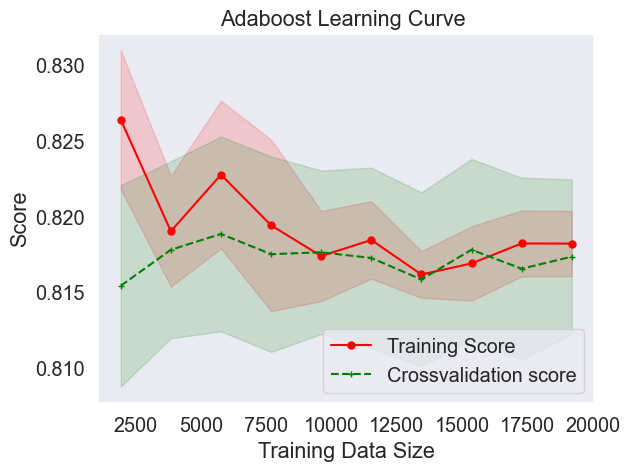

In [33]:
#Learning curve

train_sizes, train_scores, test_scores = learning_curve(estimator=ada_clf, X=X_train, y=y_train,
                                                        cv=5, train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Crossvalidation score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Adaboost Learning Curve ')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid()
plt.legend(loc='lower right')
plt.show()


### Extra Trees Classifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier(n_estimators=50)
extra_trees.fit(X_train, y_train)
y_pred_xt = extra_trees.predict(X_test)

y_pred_xt = extra_trees.predict(X_test)
y_pred_xt_proba = extra_trees.predict_proba(X_test)


print(f"accuracy_score: {accuracy_score(y_test, y_pred_xt)}")
print(f"precision_score: {precision_score(y_test, y_pred_xt)}")
print(f"recall_score: {recall_score(y_test, y_pred_xt)}")
print(f"f1_score: {f1_score(y_test, y_pred_xt)}")
xt_auc=roc_auc_score(y_test, y_pred_xt_proba[:,1])
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_xt_proba[:,1])}")

accuracy_score: 0.8076666666666666
precision_score: 0.6127770534550195
recall_score: 0.3541823662396383
f1_score: 0.448901623686724
roc_auc_score: 0.7547501875079321


In [35]:
accuracy_xt=accuracy_score(y_test, y_pred_xt)
precision_xt=precision_score(y_test,y_pred_xt)
recall_xt=recall_score(y_test, y_pred_xt)
f1_xt=f1_score(y_test,y_pred_xt)


print(f"accuracy_score: {accuracy_score(y_test, y_pred_xt)}")
print(f"precision_score: {precision_score(y_test, y_pred_xt)}")
print(f"recall_score: {recall_score(y_test, y_pred_xt)}")
print(f"f1_score: {f1_score(y_test, y_pred_xt)}")
xt_auc=roc_auc_score(y_test, y_pred_xt_proba[:,1])
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_xt_proba[:,1])}")

accuracy_score: 0.8076666666666666
precision_score: 0.6127770534550195
recall_score: 0.3541823662396383
f1_score: 0.448901623686724
roc_auc_score: 0.7547501875079321


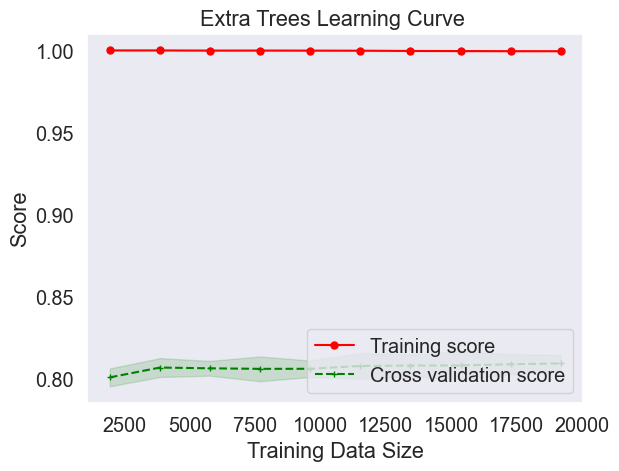

In [36]:
#Learning curve

train_sizes, train_scores, test_scores = learning_curve(estimator=extra_trees, X=X_train, y=y_train,
                                                        cv=5, train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Extra Trees Learning Curve ')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

The training accuracy is one and there is a huge difference between training and validation accuracy. This model suffer from high variance (overfitting). Probably using cross-validation, adding more data etc. might improve the model.

### Gradient boosting classifier

In [37]:

from sklearn.ensemble import GradientBoostingClassifier

gbes = GradientBoostingClassifier(n_estimators=50, random_state=123)
gbes.fit(X_train, y_train)
y_pred_gbes = gbes.predict(X_test)

y_pred_gbes_proba = gbes.predict_proba(X_test)


In [38]:
accuracy_gbes=accuracy_score(y_test, y_pred_gbes)
precision_gbes=precision_score(y_test,y_pred_gbes)
recall_gbes=recall_score(y_test, y_pred_gbes)
f1_gbes=f1_score(y_test,y_pred_gbes)


print(f"accuracy_score: {accuracy_score(y_test, y_pred_gbes)}")
print(f"precision_score: {precision_score(y_test, y_pred_gbes)}")
print(f"recall_score: {recall_score(y_test, y_pred_gbes)}")
print(f"f1_score: {f1_score(y_test, y_pred_gbes)}")
gbes_auc=roc_auc_score(y_test, y_pred_gbes_proba[:,1])
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_gbes_proba[:,1])}")

accuracy_score: 0.8231666666666667
precision_score: 0.6944444444444444
recall_score: 0.3579502637528259
f1_score: 0.4724017901541522
roc_auc_score: 0.7804717120639323


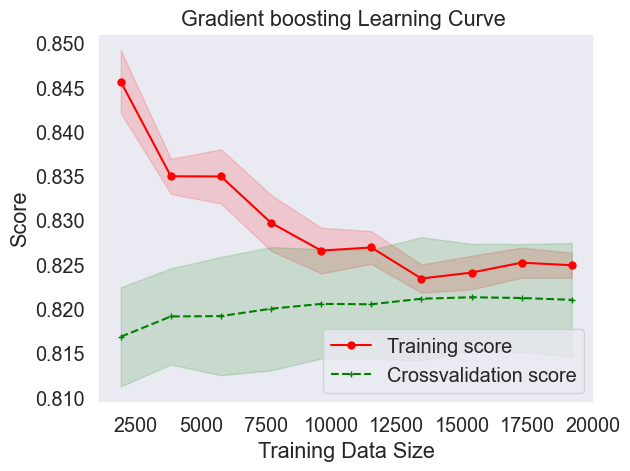

In [39]:
#Learning curve

train_sizes, train_scores, test_scores = learning_curve(estimator=gbes, X=X_train, y=y_train,
                                                        cv=5, train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Crossvalidation score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Gradient boosting Learning Curve ')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

For Training data sample less than 12500, the difference between training and validation accuracy is large. This is a case of over fitting, however after 12500 samples the difference is less and the model is performing better. More data smaples tend to increase the performance of this model. 

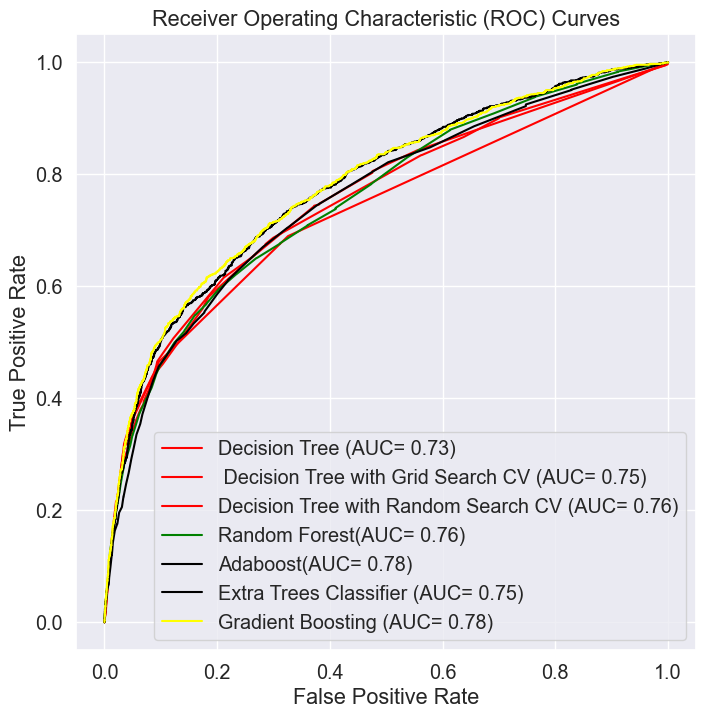

In [40]:
# Plotting the ROC Curves for all models to compare them

from sklearn.metrics import roc_curve

decision_tree_fpr, decision_tree_tpr, decision_tree_thresholds = roc_curve(y_test, y_pred_proba[:,1])
decision_tree2_fpr, decision_tree2_tpr, decision_tree2_thresholds = roc_curve(y_test, y_pred_proba_gs[:,1])
decision_tree3_fpr, decision_tree3_tpr, decision_tree3_thresholds = roc_curve(y_test, y_pred_proba_rcv[:,1])
rnd_fpr, rnd_tpr, rnd_thresholds = roc_curve(y_test,  y_pred_rf_proba[:,1])
ada_clf_fpr, ada_clf_tpr, ada_clf_thresholds = roc_curve(y_test, y_pred_ada_proba[:,1])
xt_fpr, xt_tpr, xt_thresholds = roc_curve(y_test,  y_pred_xt_proba[:,1])
gbes_fpr, gbes_tpr, gbes_thresholds = roc_curve(y_test, y_pred_gbes_proba[:,1])

plt.figure(figsize=(8,8))
plt.plot(decision_tree_fpr, decision_tree_tpr, color='red', label='Decision Tree (AUC= %0.2f)'% d_tree_auc)
plt.plot(decision_tree2_fpr, decision_tree2_tpr, color='red', label=' Decision Tree with Grid Search CV (AUC= %0.2f)'% gs_auc)
plt.plot(decision_tree3_fpr, decision_tree3_tpr, color='red', label='Decision Tree with Random Search CV (AUC= %0.2f)'% rcv_auc)
plt.plot(rnd_fpr, rnd_tpr, color='green', label='Random Forest(AUC= %0.2f)'% rnd_auc)
plt.plot(ada_clf_fpr, ada_clf_tpr, color='black', label='Adaboost(AUC= %0.2f)'% ada_auc)
plt.plot(xt_fpr, xt_tpr, color='black', label='Extra Trees Classifier (AUC= %0.2f)'% xt_auc)
plt.plot(gbes_fpr, gbes_tpr, color='yellow', label='Gradient Boosting (AUC= %0.2f)'% gbes_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

The AUC is highest for the Gradient boosting classifier and Adaboost (0.78), followed by Random Forest. Area under the curve is the ability of the classifier to distinguish between classes, higher the AUC better teh model is at distinguishing classes.

In [41]:
Accuracy_Scores = [accuracy_dtree, accuracy_gs, accuracy_rcv, accuracy_rnd, accuracy_ada, accuracy_xt, accuracy_gbes]
Precision_Scores = [precision_dtree, precision_gs,precision_rcv, precision_rnd, precision_ada, precision_xt, precision_gbes]
Recall_Scores = [recall_dtree, recall_gs, recall_rcv, recall_rnd, recall_ada, recall_xt, recall_gbes]
F1_Scores = [f1_dtree, f1_gs,f1_rcv, f1_rnd, f1_ada, f1_xt, f1_gbes]
Models =['Decision Tree', 'DTree with GCV', 'DTree with RCV', 'Random Forest', 'Adaboost', 'Extra Trees', 'Gradient Boosting']

In [42]:
Accuracy_Scores =  [round(item, 3) for item in Accuracy_Scores ]
Precision_Scores=[round(item, 3) for item in Precision_Scores  ]
Recall_Scores=[round(item, 3) for item in Recall_Scores ]
F1_Scores=[round(item, 3) for item in F1_Scores ]

C:\Users\manju\AppData\Local\Temp\ipykernel_16028\899518508.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Models)
C:\Users\manju\AppData\Local\Temp\ipykernel_16028\899518508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Models)
C:\Users\manju\AppData\Local\Temp\ipykernel_16028\899518508.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(Models)
C:\Users\manju\AppData\Local\Temp\ipykernel_16028\899518508.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(Models)


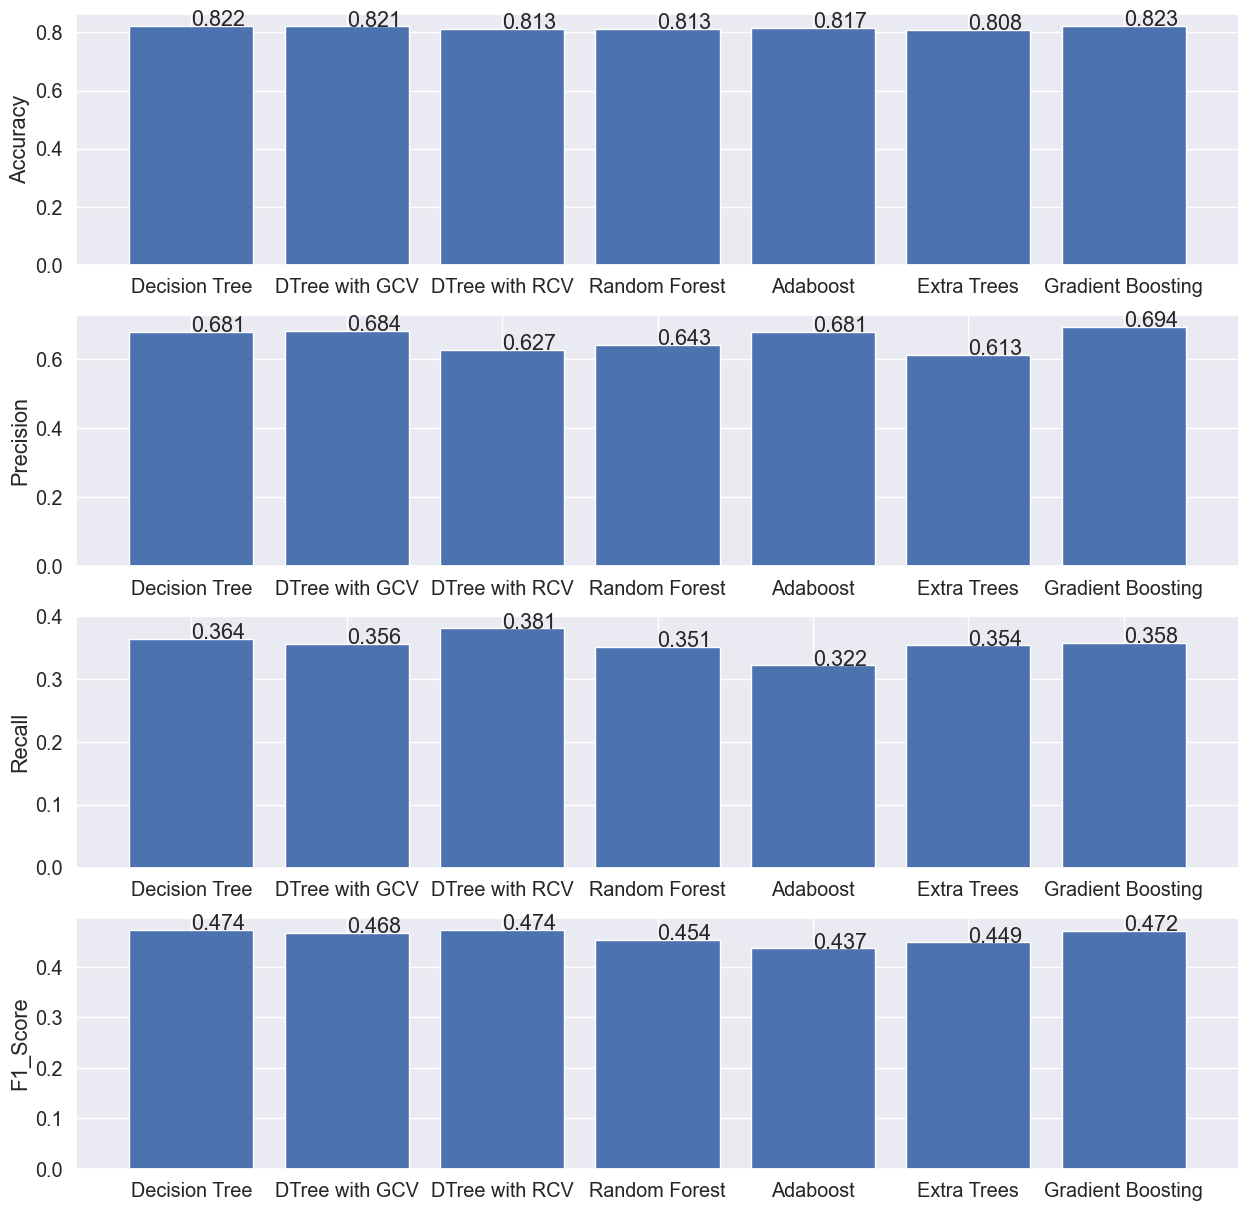

In [43]:
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
        
plt.figure(figsize=(15,15))        
ax1 = plt.subplot(4,1,1)
plt.bar(Models, Accuracy_Scores)
addlabels(Models, Accuracy_Scores)
ax1.set_xticklabels(Models)
ax1.set_ylabel('Accuracy')

plt.plot()

ax2 = plt.subplot(4,1,2)
plt.bar(Models, Precision_Scores)
addlabels(Models, Precision_Scores)
ax2.set_xticklabels(Models)
ax2.set_ylabel('Precision')
plt.plot()

ax3 = plt.subplot(4,1,3)
plt.bar(Models, Recall_Scores)
addlabels(Models, Recall_Scores)
ax3.set_xticklabels(Models)
ax3.set_ylabel('Recall')
plt.plot()

ax4 = plt.subplot(4,1,4)
plt.bar(Models, F1_Scores)
addlabels(Models, F1_Scores)
ax4.set_xticklabels(Models)
ax4.set_ylabel('F1_Score')
plt.plot()

plt.show()

From the above scores, we can see that Gradient boosting classifier has the highest accuracy score (0.823), highest precision score (0.694) and high F1 score as well. As we already know, ensemble methods like Gradient boosting has better predictive performance than individual models, which is reflected here as well. However, the time taken to train Gradient boosting was high.

Hyperparameter Tuning is searching for the right set of hyperparameter to achieve high precision and accuracy. Here we attempted Decision Tree alone, and Decision tree with both Grid Search and Random Search CV to choose the optimal parameters for the model. From the accuracy scores, we can see that the accuracy, precision are slighly higher for the Grid Search than RandomSearch CV. This probably is because in Grid Search all the combination of hyperparameter values are tried and the model that gives the highest accuracy wins. This works well for small datasets, but for higher dimensions, this will be very inefficient. In Random search random combinations of the hyperparameters are used to find the best solution for model. RandomSearch can easily and efficiently find the optimized values across important parameters. Random Search would be efficient when we have large datasets and is computationaly efficient than Grid search.

Let's look at the lurning curves generated earlier. Learning curve is used to assess how models will perform with varying numbers of training samples. The learning curves for Random Forest and Extra Trees classifier show a huge difference between the training and crossvalidation accuracy scores, which indicates over fitting or high variance. Gradient boosting classifier tend to perform well after 12500 samples, which is a good indication of bias-variance trade-off. 